In [95]:
import cv2
from matplotlib import pyplot as plt

In [96]:
nose_cascade=cv2.CascadeClassifier("Nose18x15.xml")
eye_cascade=cv2.CascadeClassifier("frontalEyes35x16.xml")

In [97]:
print(nose_cascade.empty())
print(eye_cascade.empty())


False
False


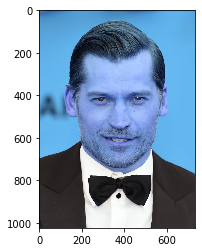

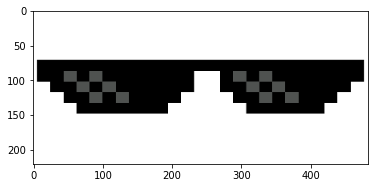

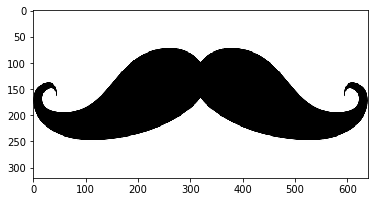

In [98]:
img=cv2.imread('Jamie_Before.jpg',-1)
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
plt.imshow(img)
plt.show()

glasses=cv2.imread('glasses.png',-1)
#glasses=cv2.cvtColor(glasses,cv2.COLOR_BGR2RGBA)
plt.imshow(glasses)
plt.show()

mustache=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
mustache=cv2.cvtColor(mustache,cv2.COLOR_BGR2RGBA)
plt.imshow(mustache)
plt.show()


In [99]:
eyes=eye_cascade.detectMultiScale(img,1.3,2)

In [100]:
print(eyes)

[[191 334 371 170]]


In [101]:
for (a,b,c,d) in eyes:
    cv2.rectangle(img,(a,b),(a+c,b+d),(0,255,255),2)

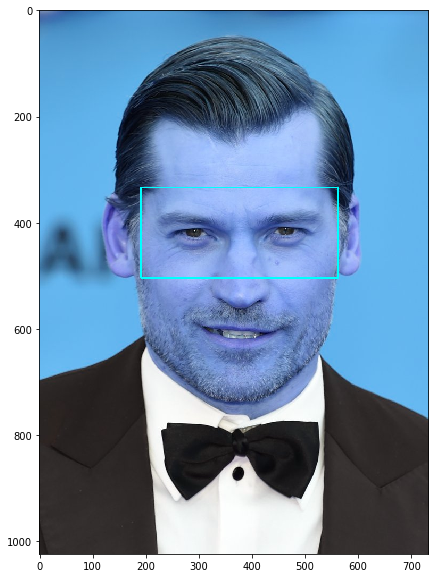

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [103]:
(a,b,c,d)=eyes[0]

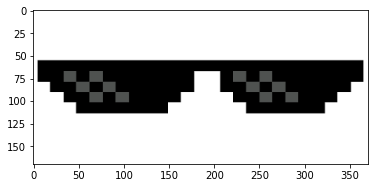

In [104]:
glasses=cv2.resize(glasses,(c,d))

plt.imshow(glasses)
plt.show()

In [105]:
def overlay_image_alpha(img, img_overlay, pos, alpha_mask):
    """Overlay img_overlay on top of img at the position specified by
    pos and blend using alpha_mask.

    Alpha mask must contain values within the range [0, 1] and be the
    same size as img_overlay.
    """

    x, y = pos

    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    channels = img.shape[2]

    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha

    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] +
                                alpha_inv * img[y1:y2, x1:x2, c])

In [106]:
x,y,w,h=eyes[0]
overlay_image_alpha(img,glasses[:, :, 0:3],(x, y),glasses[:, :, 3] / 255.0)

In [107]:
nose=nose_cascade.detectMultiScale(img,1.3,5)

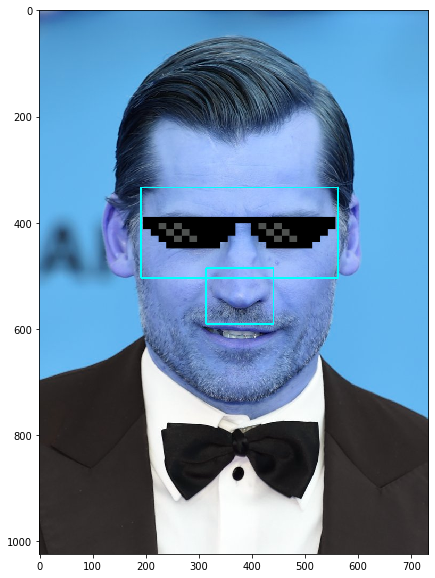

In [108]:
for (a,b,c,d) in nose:
    cv2.rectangle(img,(a,b),(a+c,b+d),(0,255,255),2)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [109]:
print(nose)

[[313 485 127 106]]


(320, 640, 4)
63
(63, 127, 4)


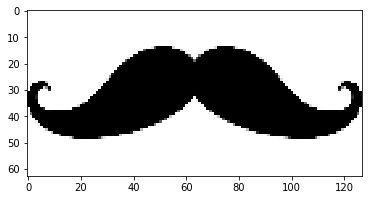

In [110]:
(x,y,w,h)=nose[0]
xs=mustache.shape[1]
ys=mustache.shape[0]
per=w/xs
xh=int(ys*per)
print(xh)

mustache=cv2.resize(mustache,(w,xh))
print(mustache.shape)
plt.imshow(mustache)

In [111]:
img=cv2.imread('Jamie_Before.jpg',-1)
ypos=int(y+0.56*h)

overlay_image_alpha(img,mustache[:, :, 0:3],(x, ypos),mustache[:, :, 3] / 255.0)

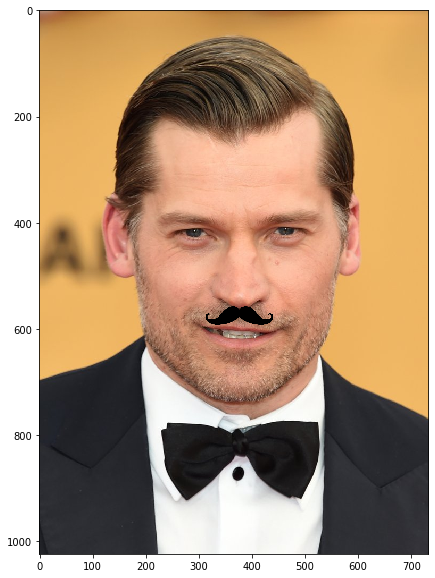

In [114]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()